In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/Users/nishanthsundaran/intelligent/AQI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/nishanthsundaran/intelligent/AQI/station_day.csv
/Users/nishanthsundaran/intelligent/AQI/.DS_Store
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_CO.pkl
/Users/nishanthsundaran/intelligent/AQI/city_day.csv
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_pm2_5.pkl
/Users/nishanthsundaran/intelligent/AQI/stations.csv
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_O3.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model.pkl
/Users/nishanthsundaran/intelligent/AQI/manoj.html
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_SO2.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_pm10.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_NO2.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/GUI sarima.ipynb
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanth SARIMA india monthly.ipynb
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model_CO.pkl
/Users/nishanthsu

In [2]:
# Load the dataset
df = pd.read_csv("/Users/nishanthsundaran/intelligent/AQI/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,26219,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,2018-03-22 02:31:12.016476672,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-02-21 00:00:00,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,2018-06-14 00:00:00,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,2019-06-26 00:00:00,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,2020-05-01 00:00:00,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064


In [4]:
df=df[['City','Date','AQI','AQI_Bucket','O3']]

In [5]:
cities=pd.unique(df['City'])
column1= cities+'O3'
column2=cities+'_AQI_'
columns=[*column1,*column2]

In [6]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-05-02',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['O3']))
    final_df[i][-n:]=np.array(df[df['City']==city]['O3'])

In [7]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [8]:
final_df.tail()

,AhmedabadO3,AizawlO3,AmaravatiO3,AmritsarO3,BengaluruO3,BhopalO3,BrajrajnagarO3,ChandigarhO3,ChennaiO3,DelhiO3,...,JaipurO3,JorapokharO3,KochiO3,KolkataO3,LucknowO3,MumbaiO3,PatnaO3,ShillongO3,TalcherO3,ThiruvananthapuramO3
2020-01-01,26.437097,NaN,42.612581,29.329615,39.277742,45.483871,29.475172,9.646452,29.704516,26.304516,...,45.015161,55.533226,12.213000,32.780968,25.265161,38.772581,15.668065,34.763871,17.796452,44.511613
2020-02-01,49.193571,NaN,41.722759,37.146190,40.929655,64.944828,32.225357,12.796897,28.166552,37.457241,...,55.135172,49.461071,11.149310,39.735172,32.047586,42.954138,16.758276,42.427037,25.515862,49.774483
2020-03-01,43.054643,6.075238,32.236774,29.792258,44.945484,68.120714,48.003333,13.580968,31.817097,37.859355,...,63.637097,50.240323,2.016129,50.064839,36.597419,30.846452,21.116452,30.480000,36.803214,40.863226
2020-04-01,46.286333,5.241429,28.085667,34.550800,40.517333,66.625417,62.463333,24.113667,36.497000,46.185667,...,50.942333,45.766800,1.291667,46.572000,26.216667,21.826667,29.000000,21.132000,65.217333,37.939667
2020-05-01,5.240000,NaN,28.600000,43.570000,30.600000,53.330000,NaN,NaN,34.120000,33.700000,...,16.320000,20.080000,NaN,25.610000,26.880000,16.300000,35.560000,NaN,24.340000,31.160000


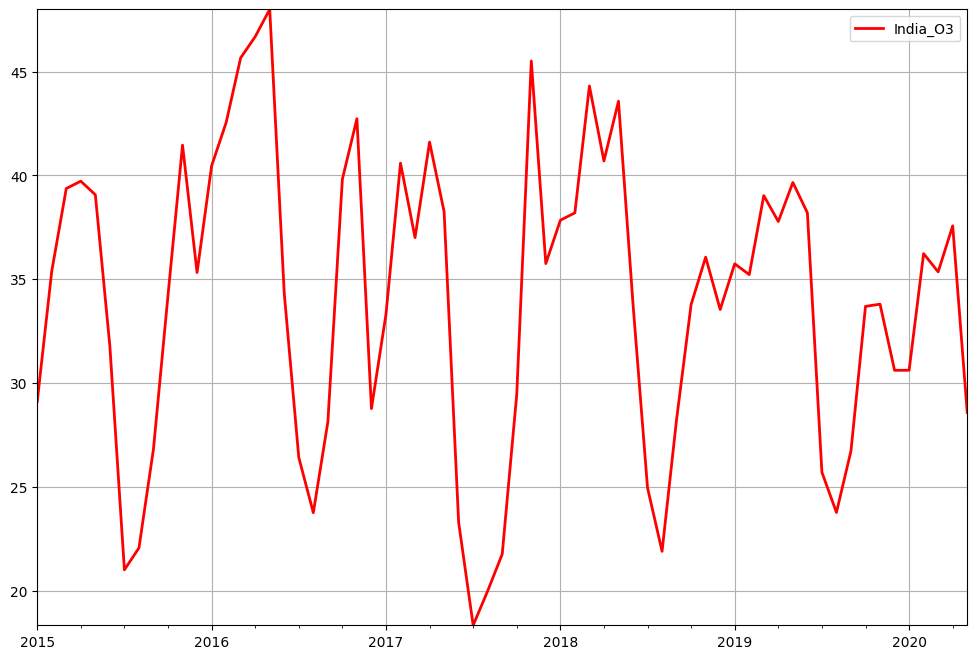

In [9]:
final_df['India_O3']=final_df.mean(axis=1)
ax=final_df[['India_O3']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [10]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,AhmedabadO3,AizawlO3,AmaravatiO3,AmritsarO3,BengaluruO3,BhopalO3,BrajrajnagarO3,ChandigarhO3,ChennaiO3,DelhiO3,...,JorapokharO3,KochiO3,KolkataO3,LucknowO3,MumbaiO3,PatnaO3,ShillongO3,TalcherO3,ThiruvananthapuramO3,India_O3
2019-01-01,52.981000,NaN,25.002258,6.630968,56.948387,NaN,7.730323,NaN,41.060968,33.860000,...,39.078065,NaN,29.521935,24.907742,52.364839,46.656129,NaN,8.778387,74.239677,35.743949
2019-02-01,44.674286,NaN,34.686071,15.745357,55.421429,NaN,9.479643,NaN,34.058929,34.103214,...,23.872500,NaN,30.971429,24.368214,61.823571,56.645357,NaN,7.601429,62.804643,35.224048
2019-03-01,47.583871,NaN,29.612258,26.221935,56.365806,NaN,11.079355,NaN,25.986452,40.262581,...,29.135862,NaN,34.331290,35.650645,61.469355,79.349032,NaN,8.192069,60.968710,39.027179
2019-04-01,42.683571,NaN,29.686667,25.055333,53.453333,NaN,14.788333,NaN,14.304333,52.130667,...,35.383667,NaN,28.733000,41.088667,23.904333,82.424667,NaN,7.717586,48.469667,37.780509
2019-05-01,38.707037,NaN,48.536774,25.995484,51.274839,NaN,19.508333,NaN,31.726129,53.002903,...,43.668333,NaN,27.215161,40.677742,18.974839,80.611935,NaN,5.991667,38.251613,39.659510


In [11]:
df_2019.isna().sum()

AhmedabadO3              0
AizawlO3                13
AmaravatiO3              1
AmritsarO3               0
BengaluruO3              0
BhopalO3                 8
BrajrajnagarO3           0
ChandigarhO3             8
ChennaiO3                0
DelhiO3                  0
ErnakulamO3             13
GurugramO3               0
GuwahatiO3               1
HyderabadO3              0
JaipurO3                 0
JorapokharO3             0
KochiO3                 12
KolkataO3                0
LucknowO3                0
MumbaiO3                 0
PatnaO3                  0
ShillongO3               7
TalcherO3                0
ThiruvananthapuramO3     0
India_O3                 0
dtype: int64

In [12]:
df_2019=df_2019.drop(['AizawlO3','ErnakulamO3','KochiO3',],axis=1)

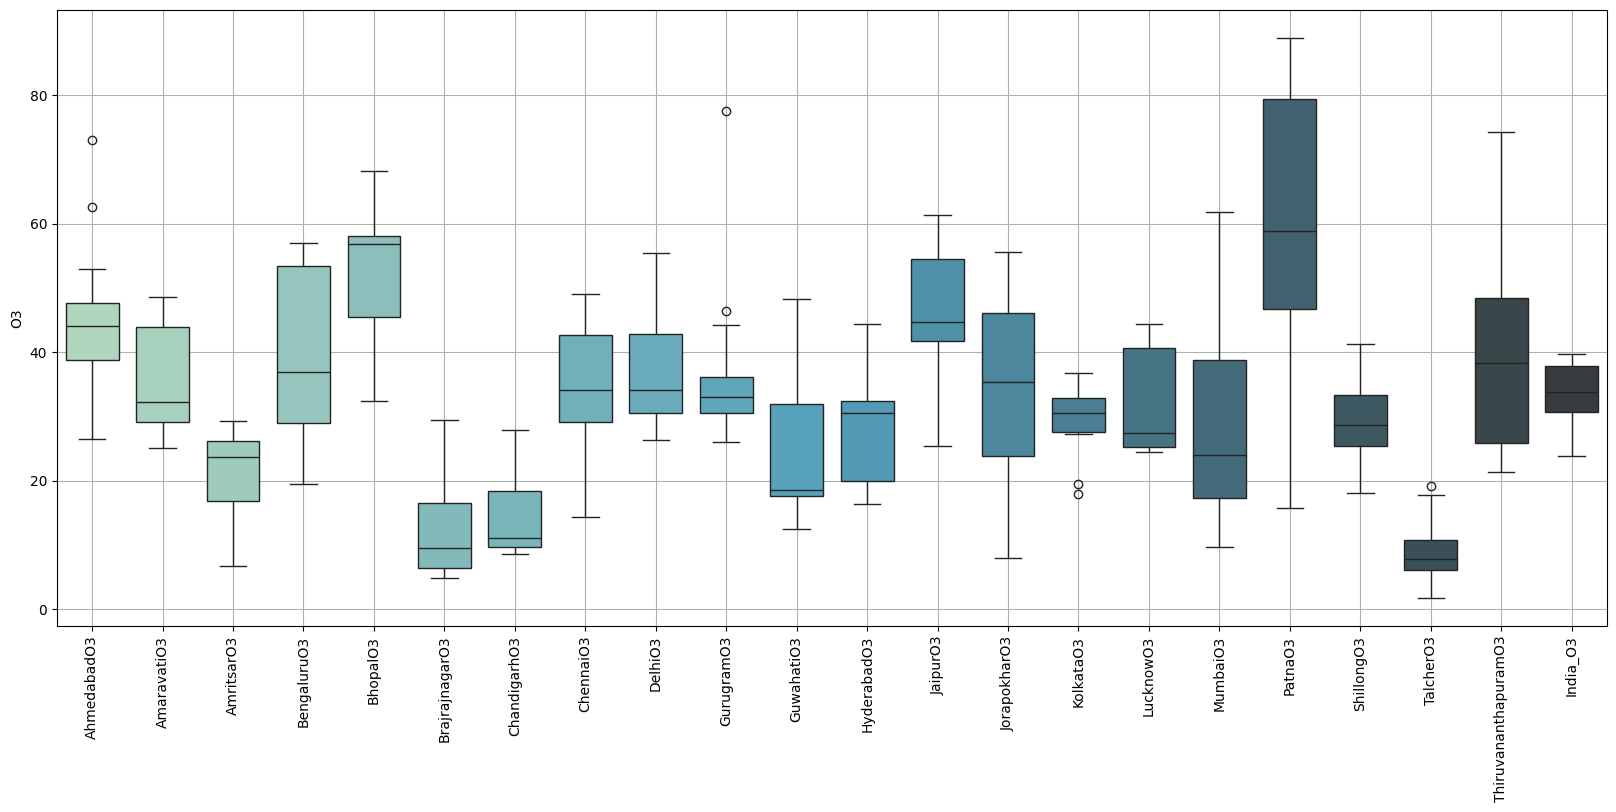

In [13]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('O3');
bplot.grid(True)

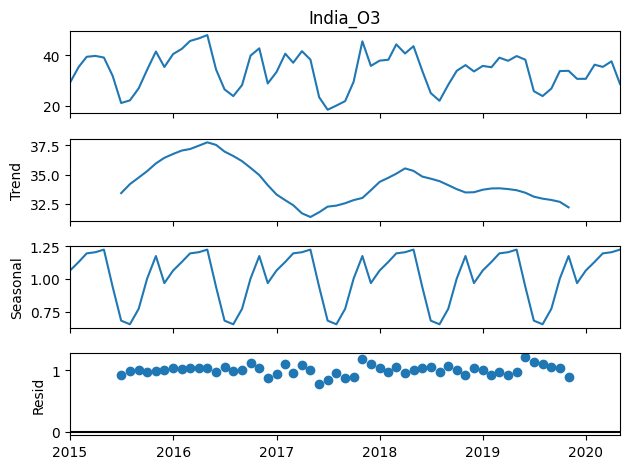

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_O3=final_df['India_O3']
result=seasonal_decompose(India_O3,model='multiplicative')
result.plot();

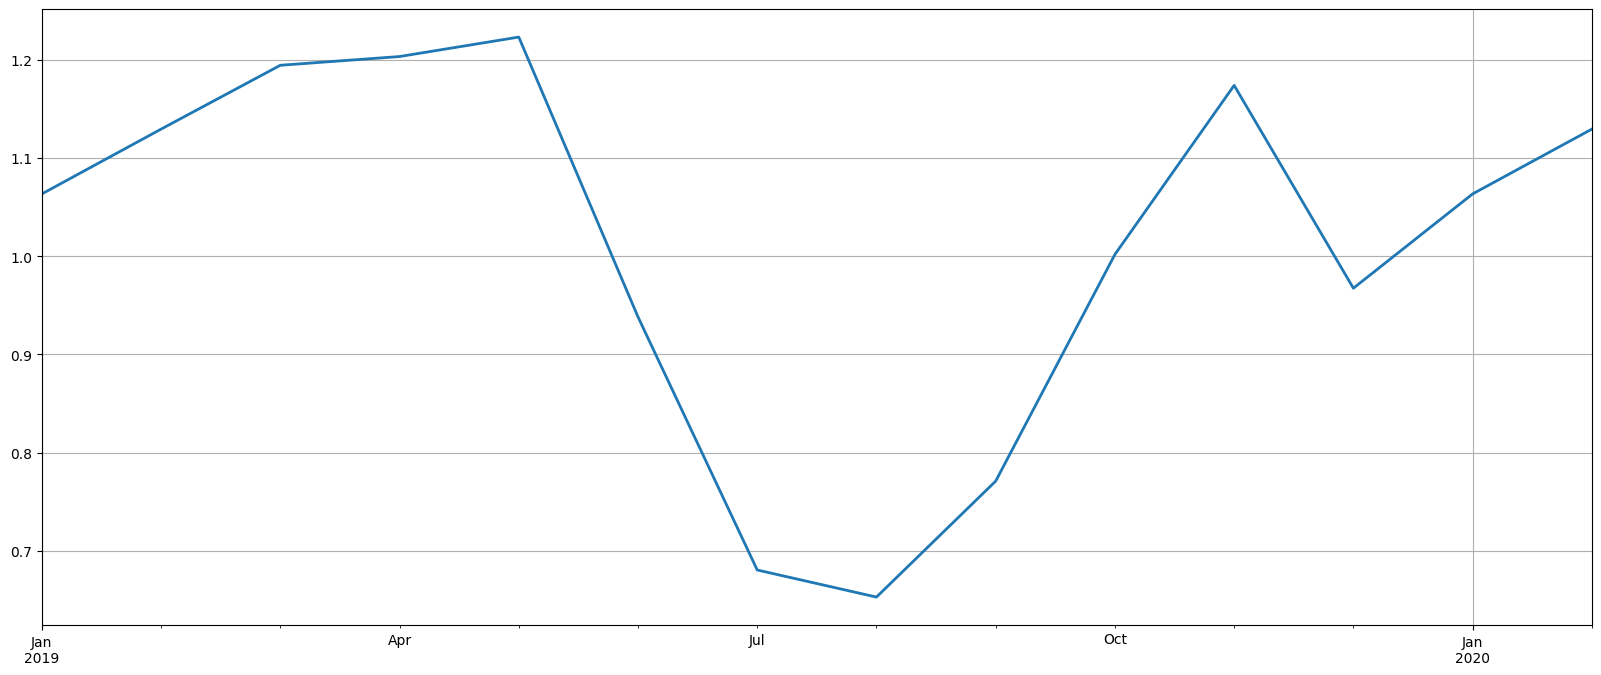

In [15]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2019-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [16]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;

In [17]:
auto_arima(y=India_O3,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   65
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -188.183
Date:                            Thu, 11 Jan 2024   AIC                            386.366
Time:                                    23:30:09   BIC                            397.238
Sample:                                01-01-2015   HQIC                           390.656
                                     - 05-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.8620      1.748      2.210      0.027       0.437       7.287
ar.L1          0.5666      0.116      4.894      0.000       0.340       0.794
ar.S.L12       0.4748      0.143      3.331      0.001       0.195       0.754
ar.S.L24       0.2547      0.133      1.919      0.055      -0.005       0.515
sigma2        16.8698      3.217      5.244      0.000      10.564      23.175
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.93   Prob(JB):                         0.93
Heteroskedasticity (H):               0.82   Skew:                            -0.05
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
#dividing into train and test:
train=India_O3[:41]
test=India_O3[42:54]

In [19]:
# Forming the model:
model=SARIMAX(train,order=(3,1,3),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68125D+00    |proj g|=  9.82535D-01

At iterate    5    f=  3.09942D+00    |proj g|=  1.61356D-01

At iterate   10    f=  2.89651D+00    |proj g|=  1.25610D-01

At iterate   15    f=  2.84683D+00    |proj g|=  7.20185D-02

At iterate   20    f=  2.82285D+00    |proj g|=  1.92657D-02

At iterate   25    f=  2.81644D+00    |proj g|=  2.14903D-02

At iterate   30    f=  2.81439D+00    |proj g|=  2.78619D-02

At iterate   35    f=  2.81229D+00    |proj g|=  2.27433D-02

At iterate   40    f=  2.81124D+00    |proj g|=  1.35662D-02

At iterate   45    f=  2.81062D+00    |proj g|=  5.28492D-03

At iterate   50    f=  2.81055D+00    |proj g|=  1.28312D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/nishanthsundaran/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             India_O3   No. Observations:                   41
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -115.233
Date:                              Thu, 11 Jan 2024   AIC                            248.465
Time:                                      23:30:09   BIC                            263.665
Sample:                                  01-01-2015   HQIC                           253.961
                                       - 05-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7192      0.247     -2.913      0.004      -1.203      -0.235
ar.L2          0.1505      0.299      0.503      0.615      -0.435       0.736
ar.L3          0.3104      0.157      1.983      0.047       0.004       0.617
ma.L1          0.6363     13.881      0.046      0.963     -26.569      27.842
ma.L2         -0.6395     15.021     -0.043      0.966     -30.081      28.802
ma.L3         -0.9967      4.746     -0.210      0.834     -10.299       8.306
ar.S.L12       0.9984      0.136      7.358      0.000       0.732       1.264
ma.S.L12      -0.8997      4.005     -0.225      0.822      -8.750       6.950
sigma2         8.7743     36.248      0.242      0.809     -62.271      79.819
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.62   Prob(JB):                         0.85
Heteroskedasticity (H):               1.32   Skew:                             0.09
Prob(H) (two-sided):                  0.62   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
#Obtaining predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

<Axes: >

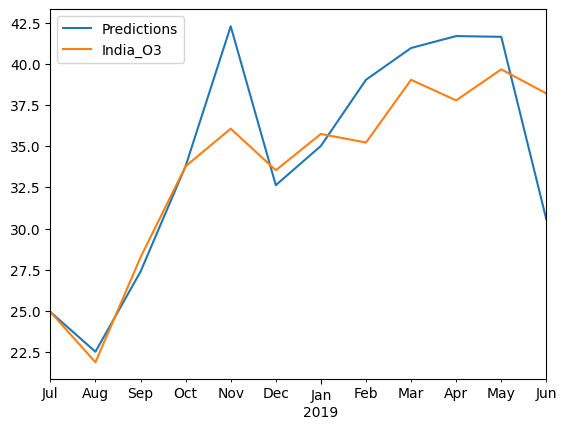

In [21]:
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True)

In [22]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean O3',test.mean())

RMSE =  3.374915682025063
Mean O3 33.67962934761686


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.05490D+00    |proj g|=  2.09940D-01

At iterate    5    f=  2.85618D+00    |proj g|=  1.19242D-01

At iterate   10    f=  2.83293D+00    |proj g|=  3.17379D-02

At iterate   15    f=  2.82141D+00    |proj g|=  1.42549D-02


 This problem is unconstrained.



At iterate   20    f=  2.81932D+00    |proj g|=  4.26772D-03

At iterate   25    f=  2.81891D+00    |proj g|=  3.20222D-03

At iterate   30    f=  2.81885D+00    |proj g|=  1.09596D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     52      1     0     0   1.671D-03   2.819D+00
  F =   2.8188361463482590     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


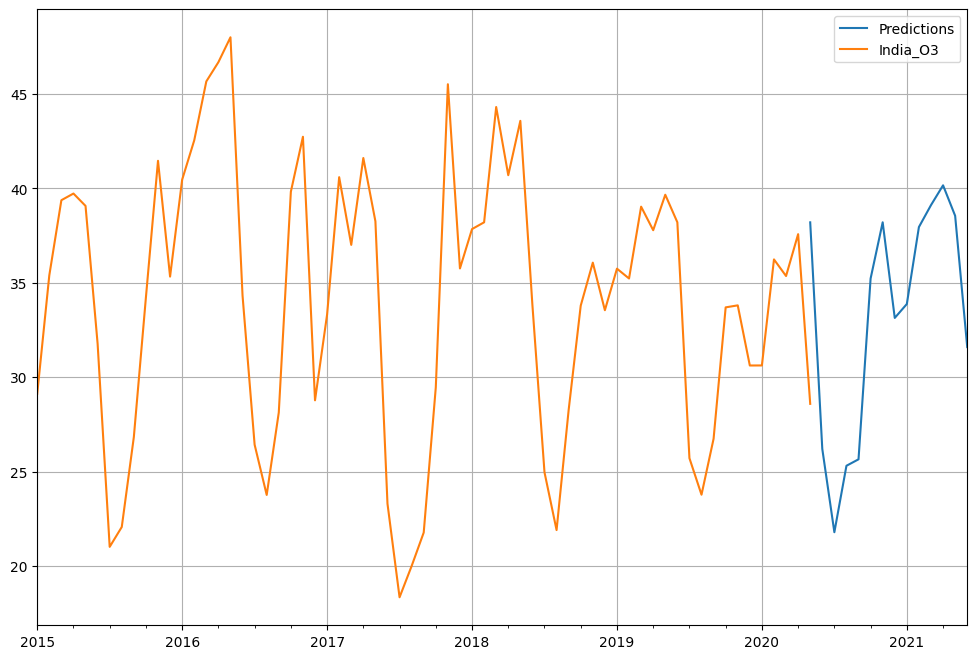

In [23]:
# Forming the model:
model=SARIMAX(India_O3,order=(2,1,3),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
India_O3.plot(legend=True,figsize=(12,8),grid=True);

In [24]:
predictions

2020-05-01    38.197171
2020-06-01    26.198893
2020-07-01    21.788652
2020-08-01    25.306941
2020-09-01    25.648397
2020-10-01    35.221286
2020-11-01    38.198623
2020-12-01    33.135887
2021-01-01    33.873162
2021-02-01    37.947591
2021-03-01    39.109289
2021-04-01    40.157789
2021-05-01    38.545016
2021-06-01    31.592830
Freq: MS, Name: Predictions, dtype: float64

In [25]:
import pickle

# Save the trained model using pickle
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_O3.pkl', 'wb') as file:
    pickle.dump(results, file)


In [26]:
import pickle
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the saved SARIMAX model
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_O3.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Extend the time index to include the forecast period
extended_index = pd.date_range(start='2015-01-01', end='2025-12-31', freq='MS')

# Specify the date for forecasting
specific_date = '2023-10-01'

# Check if the specific date is within the range of the extended index
if pd.to_datetime(specific_date) not in extended_index:
    raise ValueError(f"'specific_date' should be within the range of the extended index.")

# Make predictions using the loaded model for the specific date
forecast = loaded_model.get_prediction(start=extended_index.get_loc(specific_date), end=extended_index.get_loc(specific_date), dynamic=False)
predicted_value = forecast.predicted_mean[0]

# Display the forecasted CO value for the specified date
print(f"The forecasted O3 value for {specific_date} is: {predicted_value}")


The forecasted O3 value for 2023-10-01 is: 34.305048475441154
